# Periodic regression model

In progress

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from pysip.regressors import Regressor
from pysip.statespace import Periodic

In [3]:
# Generate artificial periodic data
np.random.seed(1)
xlim = (0, 7)
alim = (1, 3)
n = 20
period = 1
t = np.sort(xlim[0] + (xlim[1] - xlim[0]) * np.random.random(n))
amplitude = alim[0] + (alim[1] - alim[0]) * np.random.random()
noise = 0.2 * np.random.randn(n)
y = amplitude * np.sin(2.0 * np.pi / period * t) + noise
y[y <= 0] = 0.0
data = pd.DataFrame(index=t, data=y, columns=["y"])

In [4]:
# Parameter settings for the Periodic covariance function
parameters = [
    dict(name="period", value=1.0, transform="fixed"),
    dict(name="mscale", value=1.0, transform="log"),
    dict(name="lscale", value=1.0, transform="log"),
    dict(name="sigv", value=0.1, transform="log"),
]

In [5]:
# Instantiate regressor with the Periodic covariance function
reg = Regressor(Periodic(parameters), outputs="y")

In [6]:
fit_summary, corr_matrix, opt_summary = reg.fit(df=data)
fit_summary

Optimization terminated successfully.
         Current function value: 4.983631
         Iterations: 10
         Function evaluations: 84
         Gradient evaluations: 12


,θ,σ(θ),pvalue,|g(η)|,|dpen(θ)|
mscale,1.713481,0.977867,0.097745,0.000018,3.405976e-17
lscale,1.635237,0.642892,0.020986,0.000038,3.739717e-17
sigv,0.159970,0.030951,0.000077,0.000044,3.907706e-15


In [7]:
# Predict on test data
tnew = np.linspace(xlim[0], xlim[1] + 1, 500)
ds = reg.predict(df=data, tnew=tnew, smooth=True)
ym = ds.y_mean.to_dataset("outputs").y
ystd = ds.y_std.to_dataset("outputs").y

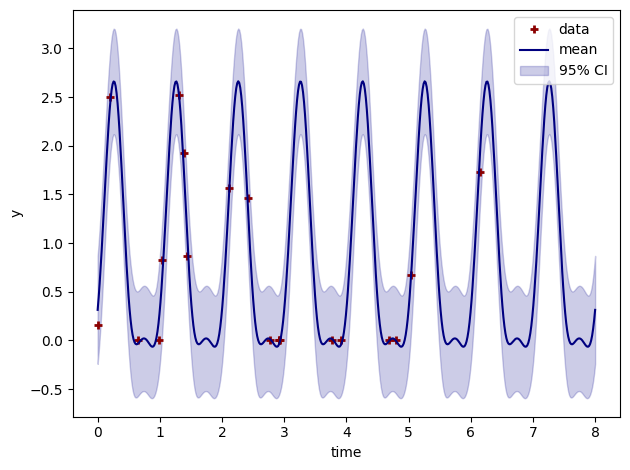

In [8]:
# Plot output mean and 95% credible intervals
plt.plot(t, y, linestyle="", marker="+", mew=2, label="data", color="darkred")
ym.plot(color="navy", label="mean")
plt.fill_between(
    ym.time,
    ym - 2 * ystd,
    ym + 2 * ystd,
    color="darkblue",
    alpha=0.2,
    label=r"95% CI",
)
plt.tight_layout()
plt.legend()